In [5]:
import os, glob
import pandas as pd
import json

res_folder = '/Users/nils/CC/afm-cnn/data/afm_v2/svmresults'
json_glob = glob.glob(os.path.join(res_folder,'*.json'))

In [10]:
df = pd.DataFrame()

for f in json_glob:
    jdict = json.load(open(f))
    results = pd.Series(jdict['cv_C']['1.0'])
    results['file'] = os.path.basename(f)
    df=df.append(results,ignore_index=True)
    
df = df.join(df['file'].str.split('-',expand=True).rename(
                    columns=dict(enumerate(
                        ['layer','encode','bins','task','kernel','nfold']
                  )))
              )
df['conf'] = df['file'].str.replace('.json','-confusion.npy')
df_noise = df.loc[df['task']=='noise'].sort_values('score', ascending=False)
df_noise[['layer','encode','bins','score','std']]

,layer,encode,bins,score,std
0,vgg16_block3_conv3,vlad,128,0.53425,0.081778
4,vgg16_block3_conv3,vlad,64,0.50775,0.075101
10,vgg16_block4_conv3,vlad,256,0.47325,0.074218
17,vgg16_block5_conv3,vlad,64,0.45200,0.072009
11,vgg16_block4_conv3,vlad,64,0.44975,0.068488
2,vgg16_block3_conv3,vlad,256,0.44450,0.073304
15,vgg16_block5_conv3,vlad,256,0.41800,0.077041
13,vgg16_block5_conv3,vlad,128,0.39450,0.073733
6,vgg16_block4_conv3,vlad,100,0.35650,0.070498
8,vgg16_block4_conv3,vlad,128,0.34250,0.082228


In [21]:
df_fiber = df.loc[df['task']!='noise'].sort_values('score', ascending=False)
df_fiber[['layer','encode','bins','score','std']]

,layer,encode,bins,score,std
14,vgg16_block5_conv3,vlad,128.json,0.95500,0.031782
16,vgg16_block5_conv3,vlad,256.json,0.94925,0.031872
7,vgg16_block4_conv3,vlad,100.json,0.94425,0.036731
9,vgg16_block4_conv3,vlad,128.json,0.94350,0.035108
5,vgg16_block3_conv3,vlad,64.json,0.94250,0.034175
3,vgg16_block3_conv3,vlad,256.json,0.94200,0.037753
1,vgg16_block3_conv3,vlad,128.json,0.93850,0.038340
18,vgg16_block5_conv3,vlad,64.json,0.93550,0.035209
12,vgg16_block4_conv3,vlad,64.json,0.92550,0.033706


In [ ]:
df.set_index('task').loc[None].sort_values(['layer','bins'])

In [22]:
import numpy as np

conf = np.load(
    os.path.join(
    res_folder,
    df_noise['conf'].loc[df_noise['score'].idxmax()])
)

conf = np.sum(conf,axis=0)

<IPython.core.display.Javascript object>


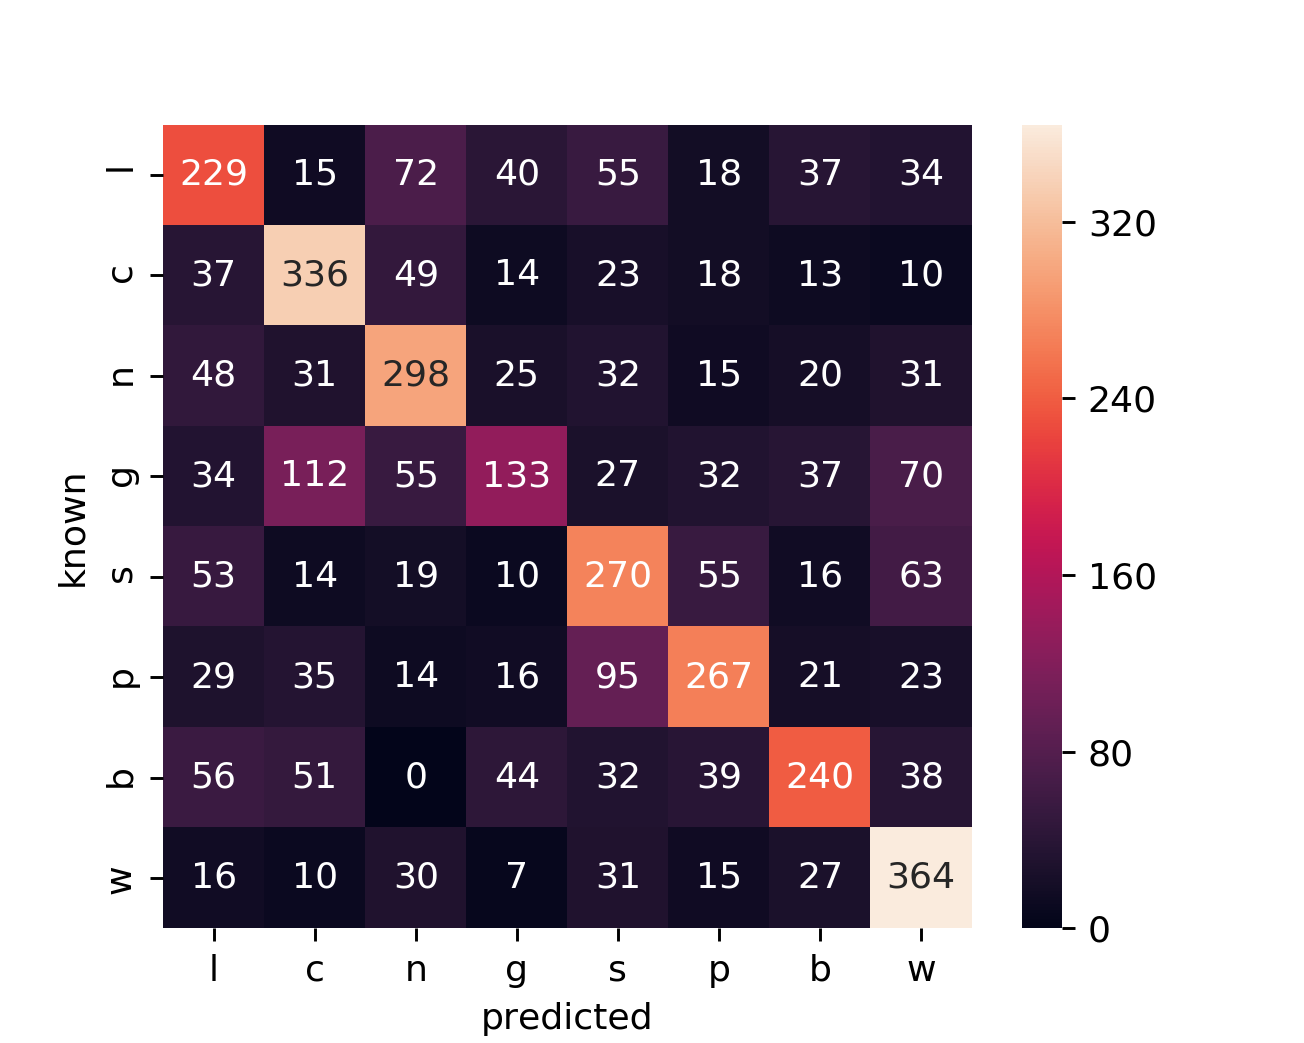

Text(33.2222,0.5,'known')

In [23]:
%matplotlib notebook
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_classes = pd.read_csv(res_folder.replace('svmresults','afm_clean.csv'))

df_cm = pd.DataFrame(conf, index = df_classes.noise.unique(),
                  columns = df_classes.noise.unique())
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True, fmt='.3g')
plt.xlabel('predicted')
plt.ylabel('known')

In [ ]:
pd.Series(conf.diagonal()/conf.sum(axis=1),
          index=df_classes.noise.unique())